In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	38005191.1538

Best Fitness:	8772462.5475
Solution:	200.0000
Diff:		8772262.5475

[0:02:35][----------] 1.96% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	33304382.8719

Best Fitness:	4913291.8606
Solution:	200.0000
Diff:		4913091.8606

[0:04:35][----------] 3.92% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	36735099.3778

Best Fitness:	8742727.6231
Solution:	200.0000
Diff:		8742527.6231

[0:06:37][#---------] 5.88% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	34075040.6770

Best Fitness:	6796977.4425
Solution:	200.0000
Diff:		6796777.4425

[0:08:38][#---------] 7.84% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	31863581.7959

Best Fitness:	10904211.3520
Solution:	200.0000
Diff:		10904011.3520

[0:10:45][#---------] 9.80% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	34368773.3632

Best Fitness:	3835925.0195
Solution:	200.0000
Diff:		3835725.0195

[0:12:42][#---------] 11.76% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	20232549.6746

Best Fitness:	3985811.3817
Solution:	200.0000
Diff:		3985611.3817

[0:14:30][#---------] 13.73% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	24480203.2558

Best Fitness:	7194516.5457
Solution:	200.0000
Diff:		7194316.5457

[0:16:19][##--------] 15.69% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	31815769.2427

Best Fitness:	6923054.5556
Solution:	200.0000
Diff:		6922854.5556

[0:18:15][##--------] 17.65% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	39006114.3859

Best Fitness:	3962967.3961
Solution:	200.0000
Diff:		3962767.3961

[0:19:57][##--------] 19.61% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	27552844.1099

Best Fitness:	5401841.4636
Solution:	200.0000
Diff:		5401641.4636

[0:21:52][##--------] 21.57% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	46683225.9091

Best Fitness:	10822748.7098
Solution:	200.0000
Diff:		10822548.7098

[0:23:54][##--------] 23.53% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	45178548.6788

Best Fitness:	9826149.9368
Solution:	200.0000
Diff:		9825949.9368

[0:26:06][###-------] 25.49% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	30494418.6847

Best Fitness:	7619988.2038
Solution:	200.0000
Diff:		7619788.2038

[0:27:55][###-------] 27.45% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	25788203.5238

Best Fitness:	3149528.2291
Solution:	200.0000
Diff:		3149328.2291

[0:29:37][###-------] 29.41% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	34513060.0000

Best Fitness:	7330357.9219
Solution:	200.0000
Diff:		7330157.9219

[0:31:20][###-------] 31.37% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	22056384.6558

Best Fitness:	3938706.1114
Solution:	200.0000
Diff:		3938506.1114

[0:33:24][###-------] 33.33% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	31211693.4816

Best Fitness:	6458095.4765
Solution:	200.0000
Diff:		6457895.4765

[0:35:15][####------] 35.29% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	34210969.3366

Best Fitness:	8823786.8372
Solution:	200.0000
Diff:		8823586.8372

[0:37:03][####------] 37.25% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	38626661.5418

Best Fitness:	8684998.8968
Solution:	200.0000
Diff:		8684798.8968

[0:38:58][####------] 39.22% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	33653115.4717

Best Fitness:	6428725.4367
Solution:	200.0000
Diff:		6428525.4367

[0:40:50][####------] 41.18% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	24376829.8066

Best Fitness:	4176407.0356
Solution:	200.0000
Diff:		4176207.0356

[0:42:20][####------] 43.14% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	37869258.7595

Best Fitness:	7665007.7540
Solution:	200.0000
Diff:		7664807.7540

[0:43:59][#####-----] 45.10% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	23654542.5498

Best Fitness:	6249776.7181
Solution:	200.0000
Diff:		6249576.7181

[0:45:51][#####-----] 47.06% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	24028189.6536

Best Fitness:	2255273.2900
Solution:	200.0000
Diff:		2255073.2900

[0:47:26][#####-----] 49.02% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	28238844.0459

Best Fitness:	2904288.7585
Solution:	200.0000
Diff:		2904088.7585

[0:49:14][#####-----] 50.98% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	54306192.0091

Best Fitness:	7645092.4755
Solution:	200.0000
Diff:		7644892.4755

[0:50:54][#####-----] 52.94% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	33950747.1904

Best Fitness:	7957251.5544
Solution:	200.0000
Diff:		7957051.5544

[0:52:43][#####-----] 54.90% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	53500279.8323

Best Fitness:	13277022.0494
Solution:	200.0000
Diff:		13276822.0494

[0:54:25][######----] 56.86% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	45960245.2362

Best Fitness:	6941141.0735
Solution:	200.0000
Diff:		6940941.0735

[0:56:09][######----] 58.82% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	35391328.2151

Best Fitness:	7251661.3243
Solution:	200.0000
Diff:		7251461.3243

[0:58:06][######----] 60.78% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	29129664.9582

Best Fitness:	6218594.3485
Solution:	200.0000
Diff:		6218394.3485

[0:59:42][######----] 62.75% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	26402975.1296

Best Fitness:	6833482.1952
Solution:	200.0000
Diff:		6833282.1952

[1:01:29][######----] 64.71% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	42073332.3391

Best Fitness:	6861165.8313
Solution:	200.0000
Diff:		6860965.8313

[1:03:04][#######---] 66.67% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	30686452.9400

Best Fitness:	8454104.8805
Solution:	200.0000
Diff:		8453904.8805

[1:04:48][#######---] 68.63% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	31091298.3835

Best Fitness:	6612752.3565
Solution:	200.0000
Diff:		6612552.3565

[1:06:32][#######---] 70.59% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	23200074.3938

Best Fitness:	5234613.4638
Solution:	200.0000
Diff:		5234413.4638

[1:08:17][#######---] 72.55% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	40646665.3512

Best Fitness:	8443832.0650
Solution:	200.0000
Diff:		8443632.0650

[1:10:05][#######---] 74.51% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	30814368.1377

Best Fitness:	6487822.6495
Solution:	200.0000
Diff:		6487622.6495

[1:11:44][########--] 76.47% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	41312858.6844

Best Fitness:	10338758.6198
Solution:	200.0000
Diff:		10338558.6198

[1:13:34][########--] 78.43% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	41896909.1359

Best Fitness:	5585531.8789
Solution:	200.0000
Diff:		5585331.8789

[1:15:15][########--] 80.39% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	56664822.8301

Best Fitness:	13139907.5388
Solution:	200.0000
Diff:		13139707.5388

[1:16:56][########--] 82.35% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	28687992.9919

Best Fitness:	6065058.8079
Solution:	200.0000
Diff:		6064858.8079

[1:18:44][########--] 84.31% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	37478895.8176

Best Fitness:	8638428.5615
Solution:	200.0000
Diff:		8638228.5615

[1:20:25][#########-] 86.27% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	29114901.3495

Best Fitness:	6479159.6961
Solution:	200.0000
Diff:		6478959.6961

[1:22:17][#########-] 88.24% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	33613249.0203

Best Fitness:	6403782.2819
Solution:	200.0000
Diff:		6403582.2819

[1:24:03][#########-] 90.20% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	34445110.3968

Best Fitness:	2917541.1038
Solution:	200.0000
Diff:		2917341.1038

[1:25:53][#########-] 92.16% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	36539096.8585

Best Fitness:	10145950.2212
Solution:	200.0000
Diff:		10145750.2212

[1:27:40][#########-] 94.12% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	28574534.5568

Best Fitness:	8023395.3924
Solution:	200.0000
Diff:		8023195.3924

[1:29:20][##########] 96.08% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	31623965.8440

Best Fitness:	6882256.7063
Solution:	200.0000
Diff:		6882056.7063

[1:30:55][##########] 98.04% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	35145537.7896

Best Fitness:	7274709.2107
Solution:	200.0000
Diff:		7274509.2107

[1:32:51][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

1:32:51

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
60,6.774400e+07,2.891552e+07,4.963604e+07,4.380018e+07,6.873969e+07,2.243204e+07,5.692757e+07,7.466238e+07,5.669203e+07,4.745778e+07,...,3.995393e+07,6.011275e+07,3.075300e+07,9.584778e+07,5.878631e+07,8.446533e+07,5.060655e+07,4.075034e+07,6.980819e+07,50
61,6.774400e+07,2.891552e+07,4.963604e+07,4.380018e+07,6.873969e+07,2.243204e+07,5.692757e+07,7.466238e+07,5.669203e+07,4.745778e+07,...,3.995393e+07,4.204918e+07,3.075300e+07,6.979152e+07,5.878631e+07,2.709429e+07,5.060655e+07,4.075034e+07,5.900549e+07,50
62,6.774400e+07,2.891552e+07,4.963604e+07,4.380018e+07,5.205959e+07,2.243204e+07,3.320110e+07,5.230357e+07,5.669203e+07,1.633455e+07,...,3.995393e+07,3.799720e+07,3.075300e+07,4.701555e+07,5.878631e+07,2.709429e+07,3.201506e+07,4.075034e+07,4.390778e+07,50
63,6.774400e+07,2.891552e+07,4.963604e+07,4.380018e+07,5.120227e+07,2.243204e+07,3.320110e+07,5.230357e+07,4.826167e+07,1.633455e+07,...,3.995393e+07,2.870086e+07,3.075300e+07,3.788383e+07,5.878631e+07,2.709429e+07,3.201506e+07,7.274509e+06,2.740400e+07,50
64,6.774400e+07,2.891552e+07,4.963604e+07,4.380018e+07,5.120227e+07,2.243204e+07,3.320110e+07,4.195046e+07,2.959739e+07,1.633455e+07,...,3.995393e+07,2.870086e+07,3.075300e+07,3.788383e+07,5.878631e+07,2.709429e+07,3.201506e+07,7.274509e+06,2.740400e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 8772262.547535066

Best error for run 1: 4913091.860575677

Best error for run 2: 8742527.62313317

Best error for run 3: 6796777.442501953

Best error for run 4: 10904011.35200105

Best error for run 5: 3835725.0195321618

Best error for run 6: 3985611.3816663236

Best error for run 7: 7194316.545741997

Best error for run 8: 6922854.555605762

Best error for run 9: 3962767.3961334554

Best error for run 10: 5401641.463621542

Best error for run 11: 10822548.709768286

Best error for run 12: 9825949.93681004

Best error for run 13: 7619788.203764535

Best error for run 14: 3149328.229093249

Best error for run 15: 7330157.921893726

Best error for run 16: 3938506.111414778

Best error for run 17: 6457895.476474785

Best error for run 18: 8823586.837167796

Best error for run 19: 8684798.896793863

Best error for run 20: 6428525.436740913

Best error for run 21: 4176207.035615015

Best error for run 22: 7664807.753986757

Best error for run 23: 6249576.718139297

Best error for run 24: 2255073.290036669

Best error for run 25: 2904088.758485799

Best error for run 26: 7644892.475517568

Best error for run 27: 7957051.554370017

Best error for run 28: 13276822.049353583

Best error for run 29: 6940941.073501052

Best error for run 30: 7251461.324304097

Best error for run 31: 6218394.348517207

Best error for run 32: 6833282.195201099

Best error for run 33: 6860965.831254212

Best error for run 34: 8453904.880540833

Best error for run 35: 6612552.356512273

Best error for run 36: 5234413.463848047

Best error for run 37: 8443632.064966109

Best error for run 38: 6487622.649510448

Best error for run 39: 10338558.619840149

Best error for run 40: 5585331.878934552

Best error for run 41: 13139707.538842458

Best error for run 42: 6064858.80785109

Best error for run 43: 8638228.561524896

Best error for run 44: 6478959.696118822

Best error for run 45: 6403582.28186188

Best error for run 46: 2917341.1038054824

Best error for run 47: 10145750.221192956

Best error for run 48: 8023195.392363996

Best error for run 49: 6882056.70628006

Best error for run 50: 7274509.21074337

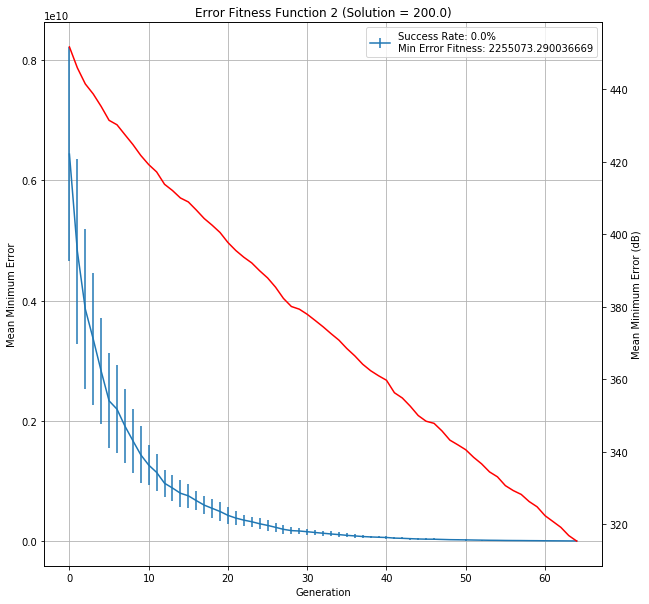

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.2,8.772263e+06,4.913092e+06,8.742528e+06,6.796777e+06,1.090401e+07,3.835725e+06,...,6.478960e+06,6.403582e+06,2.917341e+06,1.014575e+07,8.023195e+06,6.882057e+06,7.274509e+06,7.017068e+06,1:32:51,20100
